<a href="https://colab.research.google.com/github/sarahdell/DSPS_SDellorco/blob/main/hw7/Dellorco_clusteringGenes_instructionsDSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import pylab as plt
import scipy as sp
import sklearn as skl
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics import pairwise_distances, silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import umap
import umap.plot

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv')

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [4]:
genes = genes.drop(columns=['Unnamed: 0'])
genes

1         2         3         4         5         6         7  \
0    -0.146342 -0.520637  0.175828 -0.323736  0.172691  0.025156  0.024812   
1    -0.465767  0.155823  0.226344 -0.547542  0.041096  0.137012  0.102497   
2    -0.088964 -0.208241 -0.151039 -0.288229 -0.425568  0.121006 -0.097883   
3    -0.327696 -1.714948  0.068710 -0.168257 -0.471577  0.279013 -0.060734   
4    -0.092327 -0.660456  0.075948 -0.646501 -0.046137 -0.010305  0.368476   
...        ...       ...       ...       ...       ...       ...       ...   
4219 -0.314408  0.131512 -0.049018 -0.674385 -0.289890  0.258422 -0.120400   
4220 -0.313823 -0.041095 -0.049798 -0.492502 -0.223146  0.172682 -0.164426   
4221 -0.091283  0.118607 -0.088939 -0.349571 -0.107676  0.019609  0.187555   
4222 -0.552395  0.125635 -0.290230 -1.283253 -0.870161 -0.131500  0.100046   
4223 -0.907778 -0.052512 -0.216276 -1.484158 -0.719684 -0.386958 -0.123006   

             8        10        11  ...        76        77        78  \
0     0.172268  0.207188  0.026710  ...  0.240705 -0.347746 -0.001797   
1    -0.034277  0.500871  0.005533  ...  0.371435 -0.447105 -0.134904   
2    -0.007597  0.329636 -0.222495  ... -0.014990 -0.458297 -0.050852   
3    -0.222574  0.658097  0.129876  ...  0.153765 -0.140409 -0.119515   
4    -0.043832 -0.321060  0.116657  ... -0.033032  0.394082  0.173515   
...        ...       ...       ...  ...       ...       ...       ...   
4219 -0.060359  0.706799 -0.326422  ...  0.379001  0.009101 -0.182293   
4220  0.033539  0.420965 -0.180468  ...  0.086748  0.198886 -0.167620   
4221  0.214635  0.210662 -0.127357  ... -0.121660  0.004138 -0.170726   
4222  0.153907  0.582813 -0.273445  ...  0.219980 -0.503742 -0.727327   
4223 -0.313543  0.271196 -0.370716  ... -0.601880 -0.472821 -0.446067   

            79        81        83        84        85        86        87  
0    -0.260594  0.105968  0.110885 -0.006975  0.550118  0.118934  0.327248  
1    -0.250699  0.164698 -0.035022  0.250384  0.463746 -0.514230  0.200956  
2    -0.168500  0.078716 -0.032231 -0.116947 -0.199880 -0.415793 -0.032004  
3    -0.289881  0.944493 -0.142710 -1.119866 -0.215536  0.345946  0.056442  
4    -0.194819  0.149131 -0.097285 -0.288192 -0.491920 -0.722120  0.055477  
...        ...       ...       ...       ...       ...       ...       ...  
4219 -0.270911 -0.434925 -0.031925  1.402160  0.502573 -0.061042 -0.206210  
4220 -0.336774  0.022460 -0.211773  0.379261  0.465487  0.024584 -0.264364  
4221 -0.129437 -0.379607  0.007242  0.258818  0.284263 -0.008146 -0.047151  
4222 -0.477732 -0.523019 -0.382573  0.830773  0.246017 -0.002329  0.100187  
4223 -0.528082 -0.126050 -0.546075  0.043611 -0.179660 -0.712337 -0.193261  

[4224 rows x 74 columns]

In [5]:
genes.shape

(4224, 74)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

<Axes: >

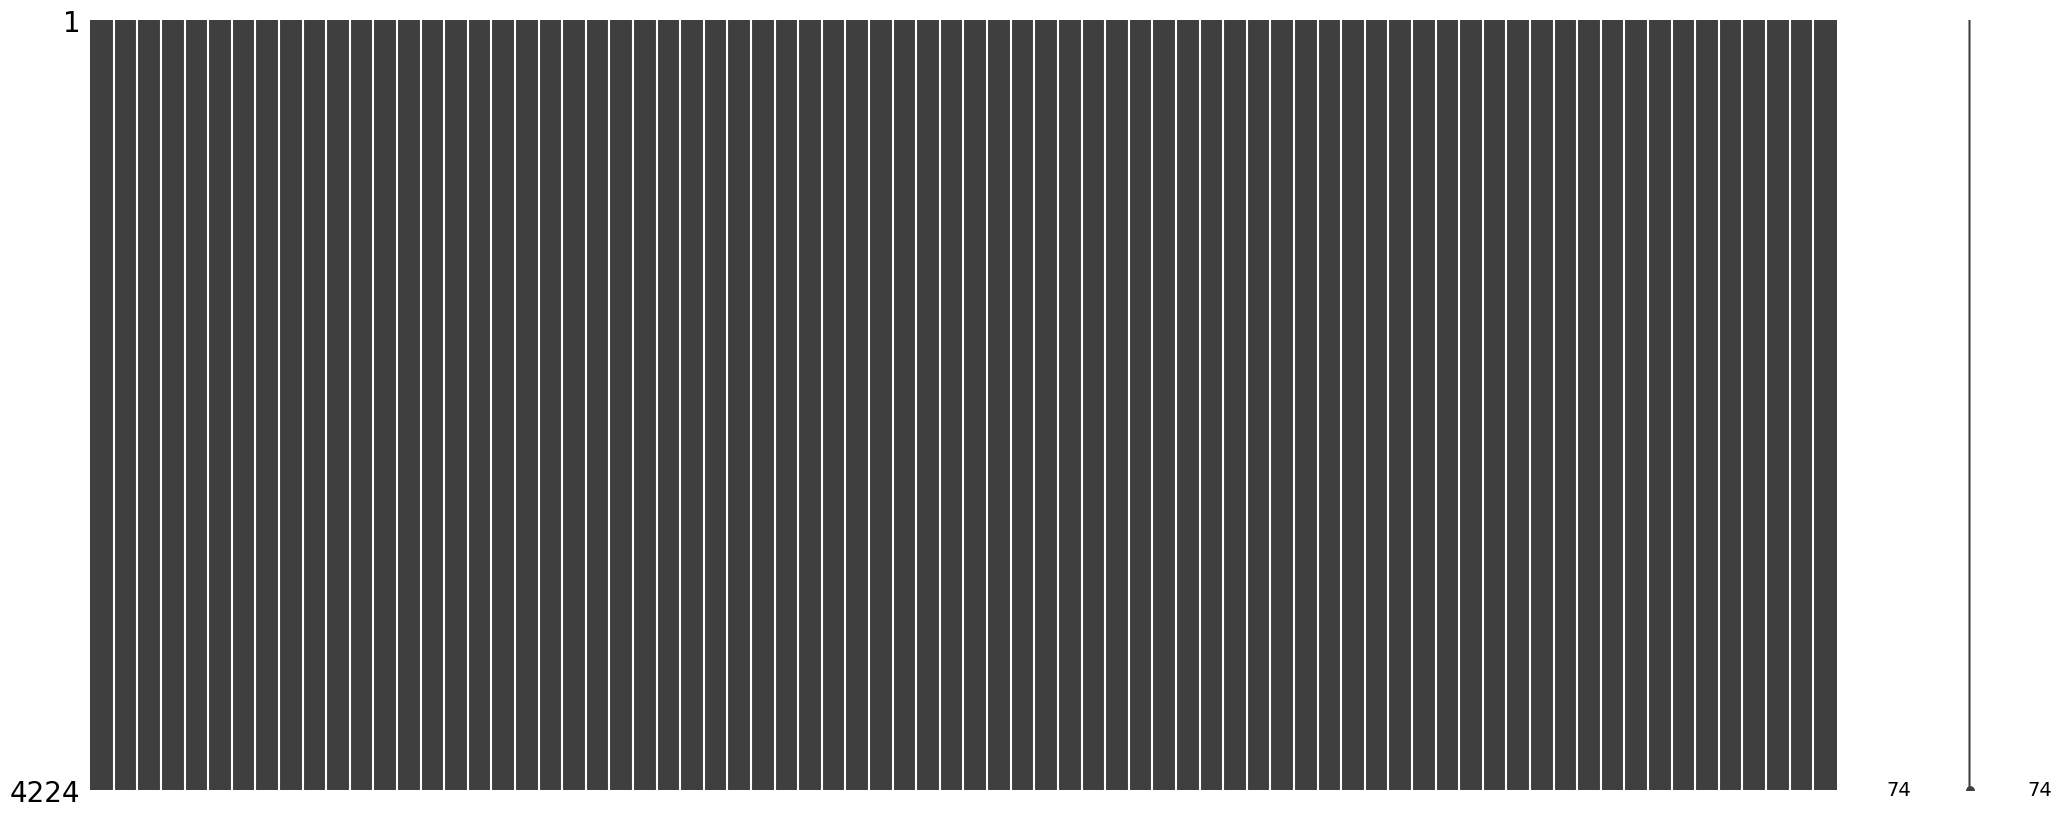

In [6]:
msno.matrix(genes)

**Figure 1:** This is a matrix of the missing data in the dataset. If there was missing data, there would be horizontal white lines within the black vertical bars. The vertical axis represents rows, and the horizontal axis represents columns within the dataset. There is also a line graph on the right showing patterns in missing data. Since the dataset is so large, it may be difficult to see small white bars of missing data, but the line graph on the right is a perfectly vertical line, indicating there is no missing data in the dataset.

<Axes: >

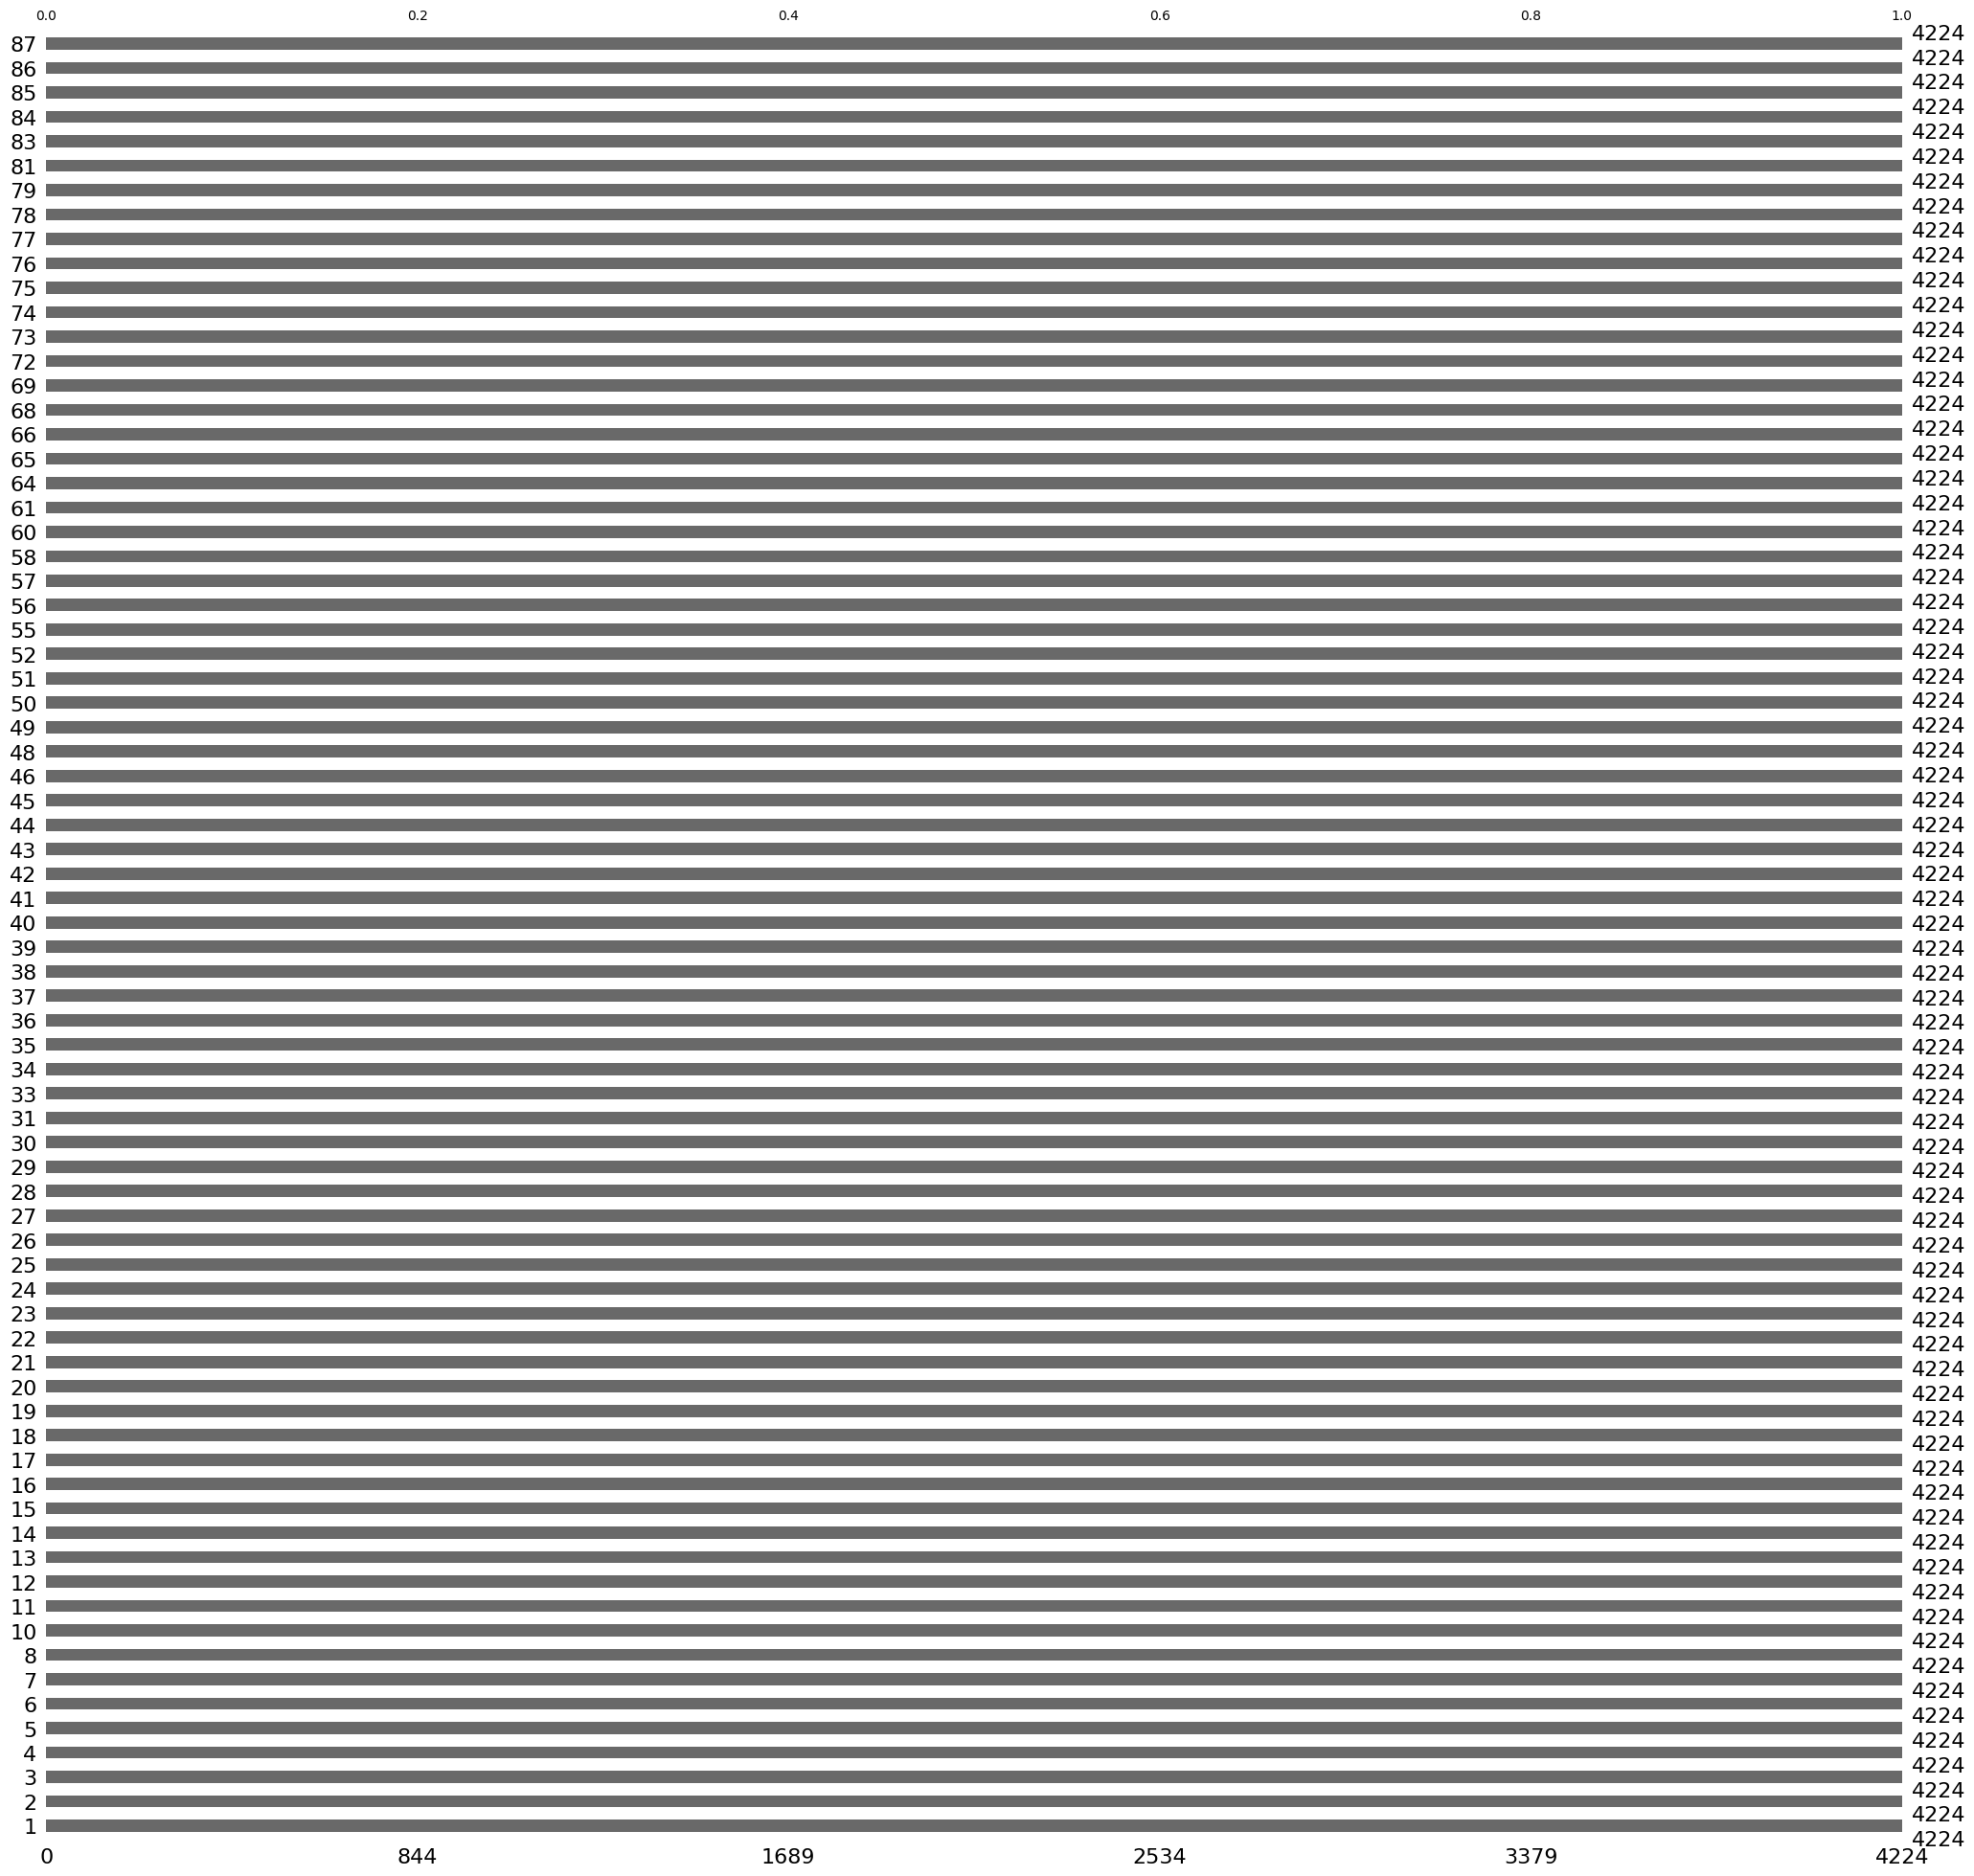

In [7]:
msno.bar(genes)

**Figure 2:** This is a bar graph of the missing values, where the vertical axis represents each row, and the horizontal axis represents the number of columns within that row containing data. Since the value shown at the right of each bar within the graph is 4224, this further indicates there are no missing values within the dataset.

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [8]:
# Scale once
scaler = StandardScaler()
scaledgenes = scaler.fit_transform(genes)

In [9]:
# Display mean and standard deviation for each feature in 'scaledgenes'
print("Mean of each feature in scaledgenes:")
print(scaledgenes.mean(0).round(2))
print("\nStandard deviation of each feature in scaledgenes:")
print(scaledgenes.std(0).round(2))

Mean of each feature in scaledgenes:
[ 0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0. -0.  0.
 -0.  0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0. -0.  0. -0. -0.
  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0.
 -0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.
 -0. -0.]

Standard deviation of each feature in scaledgenes:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [10]:
scaledgenes = pd.DataFrame(scaledgenes)
scaledgenes

0         1         2         3         4         5         6   \
0    -0.103909 -1.446312  0.541153 -0.308283  0.507069  0.073855  0.180323   
1    -0.739433  0.538795  0.695164 -0.631343  0.204461  0.394636  0.386041   
2     0.010247 -0.529571 -0.455381 -0.257028 -0.868660  0.348733 -0.144582   
3    -0.464728 -4.951082  0.214578 -0.083851 -0.974459  0.801863 -0.046210   
4     0.003558 -1.856618  0.236644 -0.774189  0.003864 -0.027839  1.090379   
...        ...       ...       ...       ...       ...       ...       ...   
4219 -0.438290  0.467450 -0.144346 -0.814438 -0.556660  0.742812 -0.204210   
4220 -0.437128 -0.039071 -0.146724 -0.551894 -0.403179  0.496928 -0.320795   
4221  0.005634  0.429583 -0.266056 -0.345574 -0.137650  0.057949  0.611283   
4222 -0.911785  0.450206 -0.879741 -1.693328 -1.891025 -0.375398  0.379552   
4223 -1.618850 -0.072576 -0.654273 -1.983331 -1.544996 -1.107998 -0.211112   

            7         8         9   ...        64        65        66  \
0     0.577397  0.549727  0.125548  ...  0.567689 -0.724406  0.067215   
1    -0.012784  1.164705  0.065613  ...  0.838749 -0.966630 -0.339377   
2     0.063451  0.806135 -0.579737  ...  0.037522 -0.993914 -0.082629   
3    -0.550824  1.493938  0.417520  ...  0.387425 -0.218945 -0.292369   
4    -0.040086 -0.556435  0.380109  ...  0.000111  1.084075  0.602728   
...        ...       ...       ...  ...       ...       ...       ...   
4219 -0.087313  1.595921 -0.873862  ...  0.854437  0.145540 -0.484134   
4220  0.180994  0.997380 -0.460793  ...  0.248469  0.608210 -0.439313   
4221  0.698458  0.557000 -0.310482  ... -0.183652  0.133442 -0.448802   
4222  0.524935  1.336293 -0.723932  ...  0.524717 -1.104705 -2.149013   
4223 -0.810761  0.683761 -0.999221  ... -1.179361 -1.029322 -1.289867   

            67        68        69        70        71        72        73  
0    -0.613430  0.219231  0.403530 -0.023856  1.132082  0.493203  0.952768  
1    -0.585542  0.369915  0.040164  0.512633  0.954949 -0.695082  0.587721  
2    -0.353867  0.149310  0.047114 -0.253103 -0.406025 -0.510342 -0.085646  
3    -0.695975  2.370657 -0.228020 -2.343784 -0.438132  0.919247  0.170007  
4    -0.428047  0.329975 -0.114893 -0.610080 -1.004946 -1.085238  0.167217  
...        ...       ...       ...       ...       ...       ...       ...  
4219 -0.642508 -1.168552  0.047876  2.913619  1.034576  0.155434 -0.589188  
4220 -0.828140  0.004972 -0.400012  0.781289  0.958519  0.316133 -0.757282  
4221 -0.243770 -1.026621  0.145417  0.530214  0.586862  0.254707 -0.129430  
4222 -1.225424 -1.394578 -0.825370  1.722508  0.508427  0.265625  0.296449  
4223 -1.367333 -0.376065 -1.232552  0.081595 -0.364558 -1.066880 -0.551759  

[4224 rows x 74 columns]

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

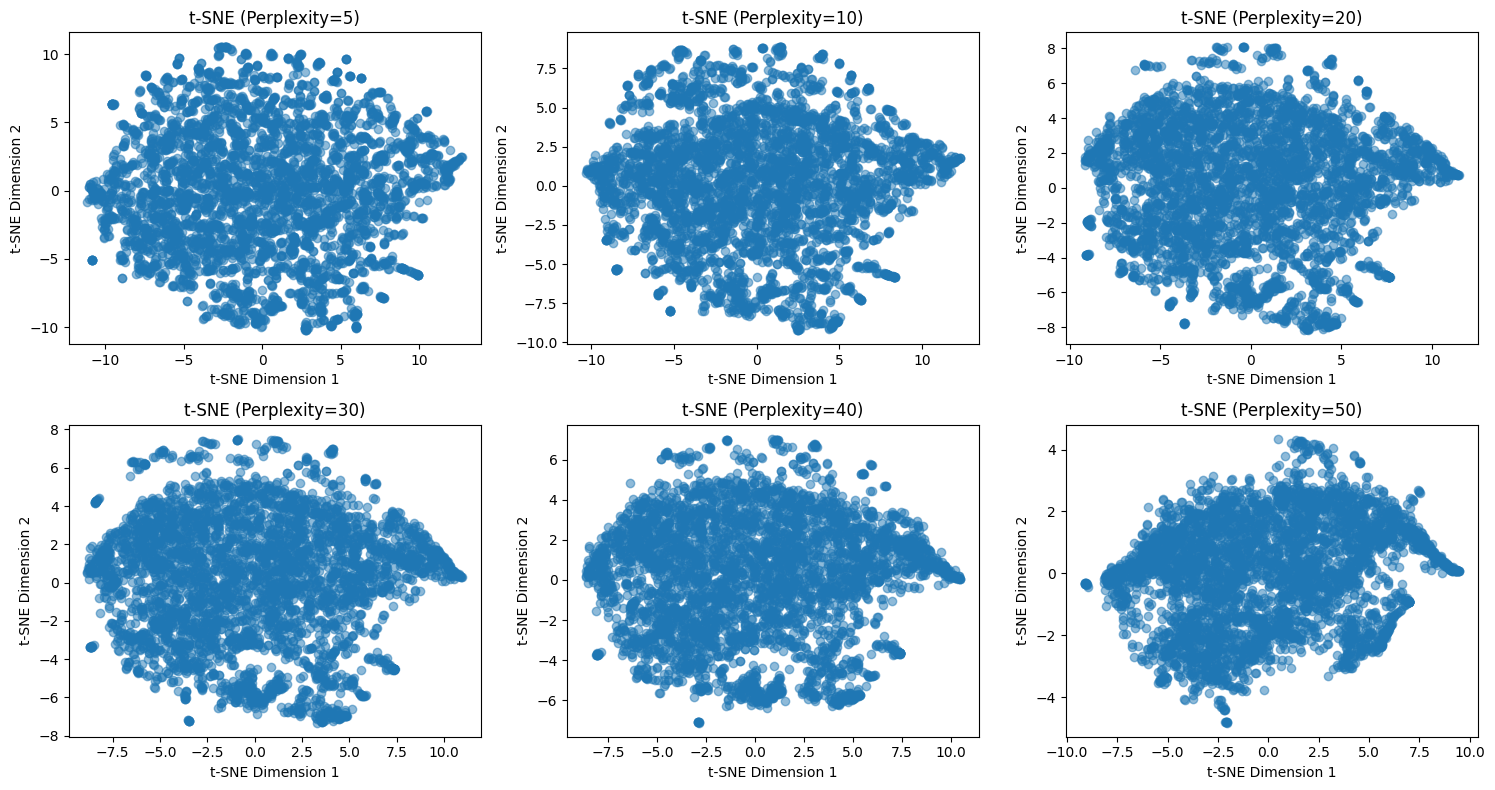

In [11]:
# Specify a range of perplexity values
perplexities = [5, 10, 20, 30, 40, 50]

# Set up subplots
num_plots = len(perplexities)
fig, axes = plt.subplots(nrows=2, ncols=num_plots // 2, figsize=(15, 8))
axes = axes.flatten()

# Perform t-SNE and create scatter plots for each perplexity
for i, perplexity in enumerate(perplexities):
    # Perform t-SNE on the scaled and whitened data
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=300)
    tsne_result = tsne.fit_transform(scaledgenes)

    # Create a scatter plot for the current perplexity
    axes[i].scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    axes[i].set_title(f't-SNE (Perplexity={perplexity})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


**Figure 3:** The t-SNE graphs using perplexities 5, 10, 20, 30, 40, and 50. As the perplexity increases, the points seem to condense into a more defined shape, as opposed to the smallest perplexity, which looks like a more-round blob. The largest perplexity has a bit of a tail on the right; it does not look as elliptical. The perplexity has to do with the number of point neighbors considered when making the projection. In none of the projections can you see clear clusters.

In [12]:
tsne_result.shape

(4224, 2)

The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

plot the TSNE 2D projection


## III-b calculate and plot the UMAP 2D projection

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


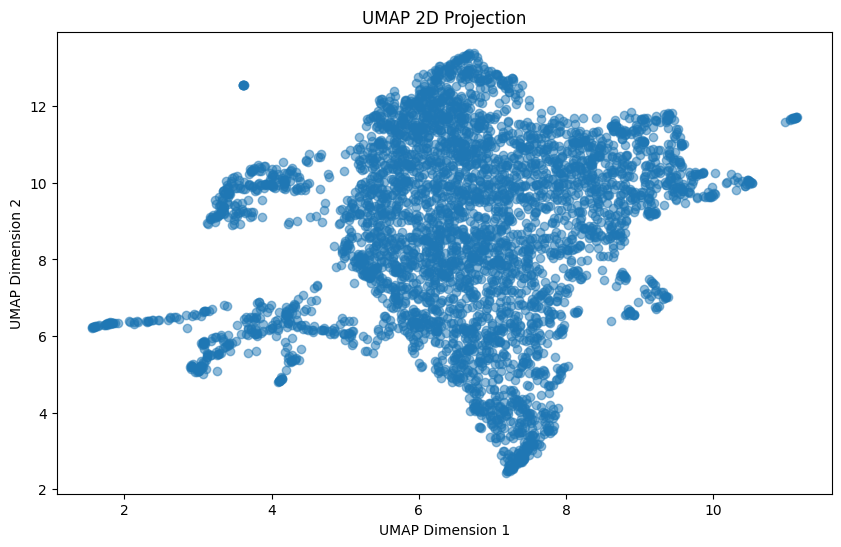

In [13]:
# Specify UMAP parameters
umap_params = {
    'n_components': 2,
    'metric': 'euclidean',
    'random_state': 42,
}

# Create UMAP mapper
mapper = umap.UMAP(**umap_params)

# Fit and transform the data
umap_result = mapper.fit_transform(scaledgenes)

# Plot the UMAP projection
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)

# Customize the plot
ax.set_title('UMAP 2D Projection')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')

# Show the plot
plt.show()

**Figure 4:** The UMAP Projection of scaledgenes dataset. The UMAP appears to be one sort of large blob with some off-branches. The effectiveness of UMAP depends on the nature of the data, and in this case the numbers in the dataframe represent qualities of genes. UMAP preserves the distance between points, but in a reduced dimensionality, so besides some possible outliers that appear outside the large blob, we seem to have one large cluster.

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [14]:
def calICVar(X, labels):
    """
    Calculates the intracluster variance of the k-MEANS algorithm.

    Parameters:
    - X: The input data (ndarray).
    - labels: The labels indicating the cluster of each datapoint (same number of data as X).

    Returns:
    - icvar: The intracluster variance.
    """
    # Get unique cluster labels
    unique_labels = np.unique(labels)

    # Initialize the intracluster variance
    icvar = 0.0

    # Calculate the intracluster variance
    for label in unique_labels:
        # Get indices of data points in the current cluster
        indices = np.where(labels == label)[0]

        # Calculate the mean of the current cluster
        mean_cluster = np.mean(X[indices], axis=0)

        # Calculate the variance of the current cluster
        variance_cluster = np.sum((X[indices] - mean_cluster) ** 2)

        # Add the variance to the overall intracluster variance
        icvar += variance_cluster

    return icvar

Intracluster Variance for 1 Clusters: 312576.00
Intracluster Variance for 2 Clusters: 246707.89
Intracluster Variance for 3 Clusters: 224492.68
Intracluster Variance for 4 Clusters: 212931.53
Intracluster Variance for 5 Clusters: 203157.19
Intracluster Variance for 6 Clusters: 196135.61
Intracluster Variance for 7 Clusters: 190794.06
Intracluster Variance for 8 Clusters: 186473.64
Intracluster Variance for 9 Clusters: 182920.44
Intracluster Variance for 10 Clusters: 179979.85


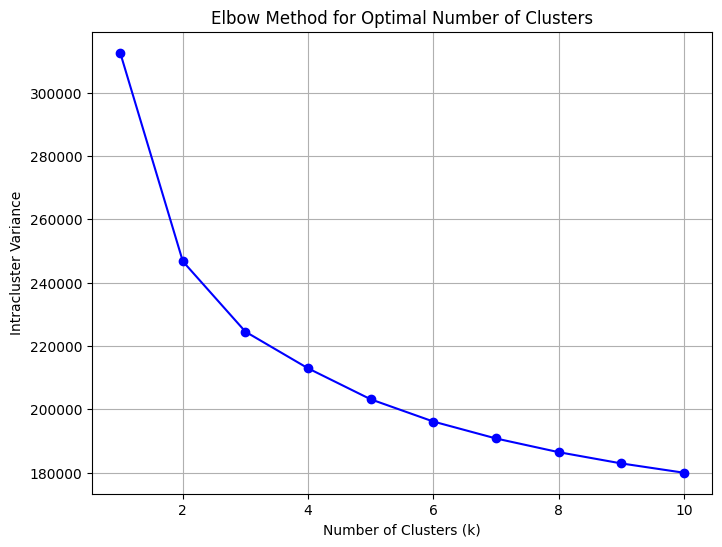

In [15]:
# Extract the features from 'scaledgenes'
X_scaledgenes = scaledgenes.values

# Range of cluster numbers to consider
num_clusters_range = range(1, 11)

# Calculate intracluster variance for different numbers of clusters
intracluster_variances = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaledgenes)
    icvar_result = calICVar(X_scaledgenes, cluster_labels)
    intracluster_variances.append(icvar_result)
    # Print the intracluster variance for each number of clusters with two decimal places
    print(f'Intracluster Variance for {num_clusters} Clusters: {icvar_result:.2f}')

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, intracluster_variances, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Intracluster Variance')
plt.grid(True)
plt.show()

**Figure 5:** Elbow Plot of Intracluster Variance vs. Number of Clusters. The elbow appears to be around 2 or 3 clusters, so I have graphed the kmeans projections for 2 and 3 clusters in the later Figures. The elbow occurs at the first point where the slope between two consecutive points dramatically decreases in magnitude. Therefore, it can be up to interpretation a bit.

cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [16]:
# Perform k-Means clustering with 2 clusters
kmeans_2_clusters = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_2 = kmeans_2_clusters.fit_predict(X_scaledgenes)

# Perform k-Means clustering with 3 clusters
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels_3 = kmeans_3_clusters.fit_predict(X_scaledgenes)

# Now, cluster_labels_2 and cluster_labels_3 contain the cluster assignments for 2 and 3 clusters, respectively


## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


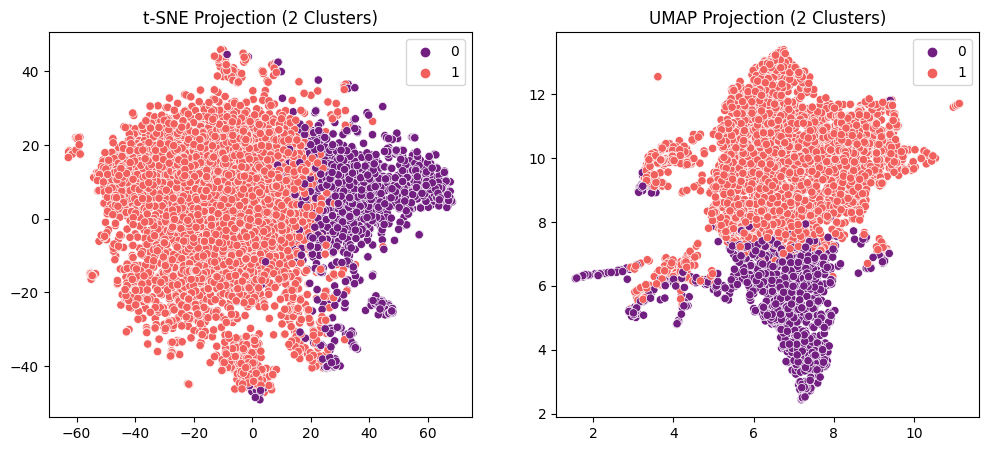

In [17]:
# Create a t-SNE projection
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_projection = tsne.fit_transform(X_scaledgenes)

# Create a UMAP projection
umap_projection = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaledgenes)

# Plot t-SNE projection with color-coded clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_projection[:, 0], y=tsne_projection[:, 1], hue=cluster_labels_2, palette='magma', legend='full')
plt.title('t-SNE Projection (2 Clusters)')

# Plot UMAP projection with color-coded clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=umap_projection[:, 0], y=umap_projection[:, 1], hue=cluster_labels_2, palette='magma', legend='full')
plt.title('UMAP Projection (2 Clusters)')

plt.show()

**Figure 6:** Above is the TSNE and the UMAP for the points split into two clusters using kmeans. You can see a sort-of border between the two clusters, but the edges in where each point is assigned seem fuzzy, meaning that the high-dimensionality reduction to a two-dimensional does not perfectly represent the clusters. The clusters don't really look defined, it looks like a big blob that is just divided into two parts.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


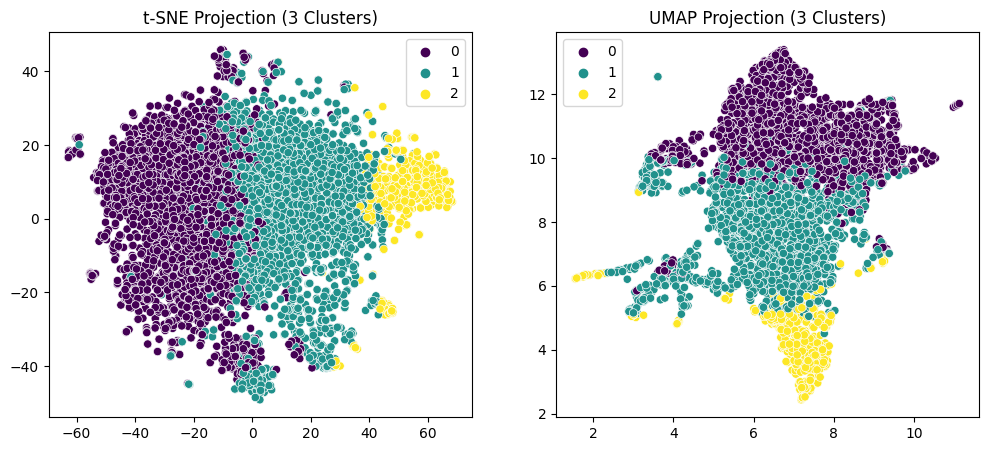

In [18]:
# Create a UMAP projection
umap_projection = umap.UMAP(n_components=2, random_state=42).fit_transform(X_scaledgenes)

# Plot t-SNE projection with color-coded clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_projection[:, 0], y=tsne_projection[:, 1], hue=cluster_labels_3, palette='viridis', legend='full')
plt.title('t-SNE Projection (3 Clusters)')

# Plot UMAP projection with color-coded clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=umap_projection[:, 0], y=umap_projection[:, 1], hue=cluster_labels_3, palette='viridis', legend='full')
plt.title('UMAP Projection (3 Clusters)')

plt.show()

**Figure 7:** Above is the TSNE and the UMAP for the points split into three clusters using kmeans. Again, the borders between each of the three clusters can be seen but is fuzzy due to the high-dimensionality of the data.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

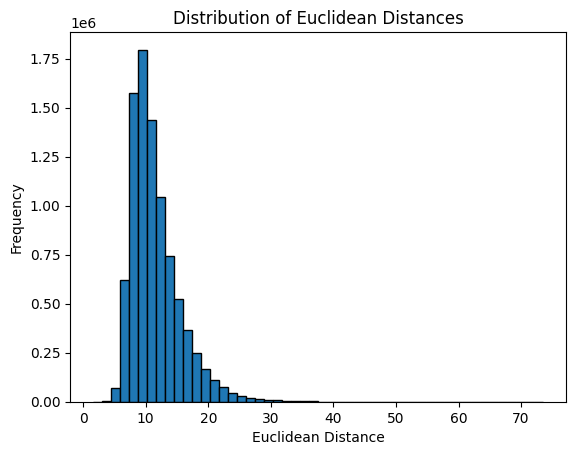

Initial eps value: 11.47


In [19]:
# Calculate the Euclidean distance matrix
distance_matrix = pairwise_distances(X_scaledgenes, metric='euclidean')

# Flatten the upper triangle of the distance matrix (excluding the diagonal)
distances = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]

# Plot the histogram of Euclidean distances
plt.hist(distances, bins=50, edgecolor='black')
plt.title('Distribution of Euclidean Distances')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.show()

# Initialize eps parameter based on the mean Euclidean distance
eps_initial = np.mean(distances)
print(f'Initial eps value: {round(float(eps_initial), 2)}')

**Figure 8:** Above is the histogram showing the distribution of Euclidean distances between points in the dataset. The average of the distances is used as the initial epsilon value, and in this case is found to be 11.47. Epsilon is the parameter that defines the radius within which the algorithm searches for neighboring data points.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

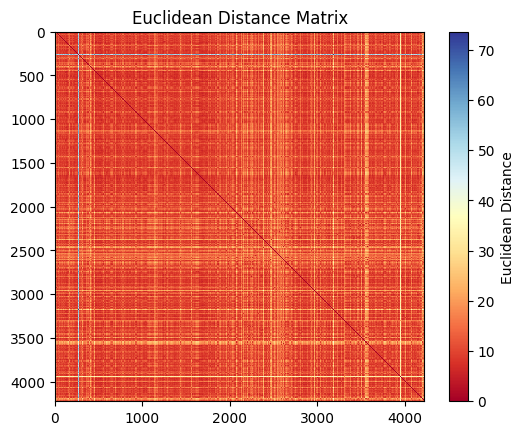

In [20]:
# Calculate pairwise Euclidean distances
pairwise_distances = squareform(pdist(X_scaledgenes, metric='euclidean'))

# Plot a heatmap of the Euclidean distance matrix
plt.imshow(pairwise_distances, cmap='RdYlBu', interpolation='none')
plt.colorbar(label='Euclidean Distance')
plt.title('Euclidean Distance Matrix')
plt.show()

**Figure 9:** Heatmap Matrix of the Euclidean Distance between datapoints in the scaledgenes dataset. Most of the points are relatively close to each other since most of the graph is red, which is in this case on the lower side of the Euclidean Distance color map. There is one blue line which is a large distance, and an outlier in terms of the distribution of distances. A Red-Yellow-Blue colormap was used so that the middle distances would be clearly visible.

## V-b Run DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

Number of clusters: 2
Number of outliers: 60


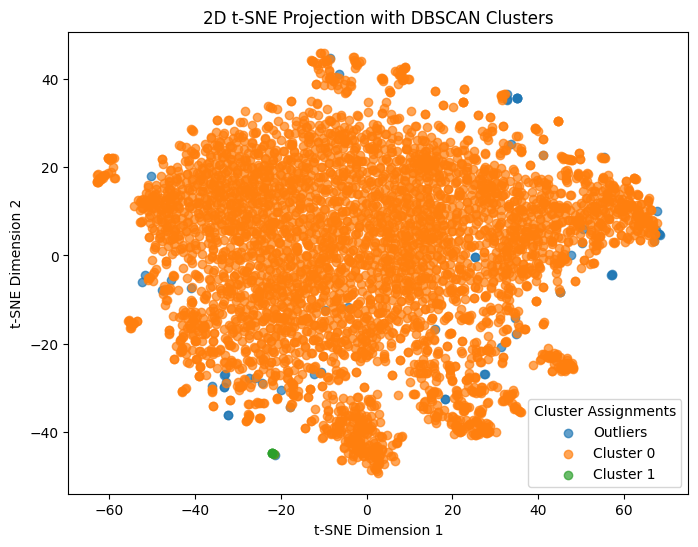

In [21]:
# Use the mean Euclidean distance as the initial value for eps
eps_initial = np.mean(pairwise_distances[np.triu_indices_from(pairwise_distances, k=1)])

# Fit a DBSCAN model with the initialized eps value
dbscan = DBSCAN(eps=9.3, min_samples=5)  # Can adjust min_samples as needed
cluster_labels = dbscan.fit_predict(X_scaledgenes)

# Get unique cluster labels (including outliers labeled as -1)
unique_labels = np.unique(cluster_labels)

# Plot the 2D t-SNE projection color-coded with DBSCAN clusters and add legend
plt.figure(figsize=(8, 6))
scatter = []
for label in unique_labels:
    indices = cluster_labels == label
    if label == -1:
        scatter.append(plt.scatter(tsne_projection[indices, 0], tsne_projection[indices, 1], label='Outliers', alpha=0.7))
    else:
        scatter.append(plt.scatter(tsne_projection[indices, 0], tsne_projection[indices, 1], label=f'Cluster {label}', alpha=0.7))

# Add legend
plt.legend(title='Cluster Assignments')

plt.title('2D t-SNE Projection with DBSCAN Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Count the number of clusters and outliers
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
num_outliers = np.sum(cluster_labels == -1)

print(f'Number of clusters: {num_clusters}')
print(f'Number of outliers: {num_outliers}')

plt.show()


**Figure 10:** t-SNE projection with color-coded clusters from DBSCAN clustering method. From the DBSCAN using the mean distance as epsilon, we get one cluster with 14 outliers. Epsilon influences the size and the shape of the cluster. It should not be larger than the mean, and larger epsilon may result in more points being considered as part of the same cluster. Since the epsilon value chosen leads to having just one cluster, a smaller epsilon value may be used to have more clusters, but since the t-SNE is just one large blob with little bits outside the blob, I would predict that an additional cluster would be a small amount of datapoints. Only 14 points are not within the cluster and considered outliers. There is not a real pattern in the outliers on the map, but they are a bit towards the edge of the blob shape. min_samples for this was set to 5. When I adjusted the epsilon value to 9.3, I ended up with two clusters and 60 outliers, but the cluster of label 1 is very tiny.

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

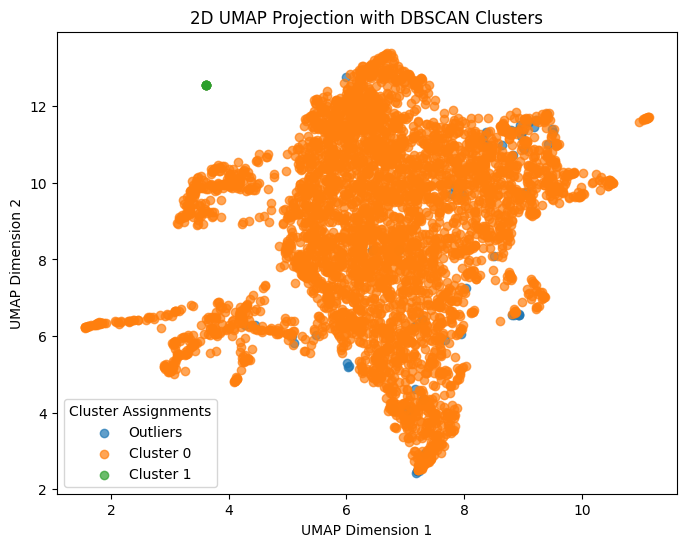

In [22]:
unique_labels = np.unique(cluster_labels)

# Plot UMAP projection with color-coded clusters
plt.figure(figsize=(8, 6))
scatter = []
for label in unique_labels:
    indices = cluster_labels == label
    if label == -1:
        scatter.append(plt.scatter(umap_projection[indices, 0], umap_projection[indices, 1], label='Outliers', alpha=0.7))
    else:
        scatter.append(plt.scatter(umap_projection[indices, 0], umap_projection[indices, 1], label=f'Cluster {label}', alpha=0.7))

# Add legend
plt.legend(title='Cluster Assignments')

plt.title('2D UMAP Projection with DBSCAN Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.show()

**Figure 11:** UMAP for the DBSCAN method of clustering. Similar type of results as the t-SNE plot, but the outliers being located towards the edges is more pronounced in the UMAP model.

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

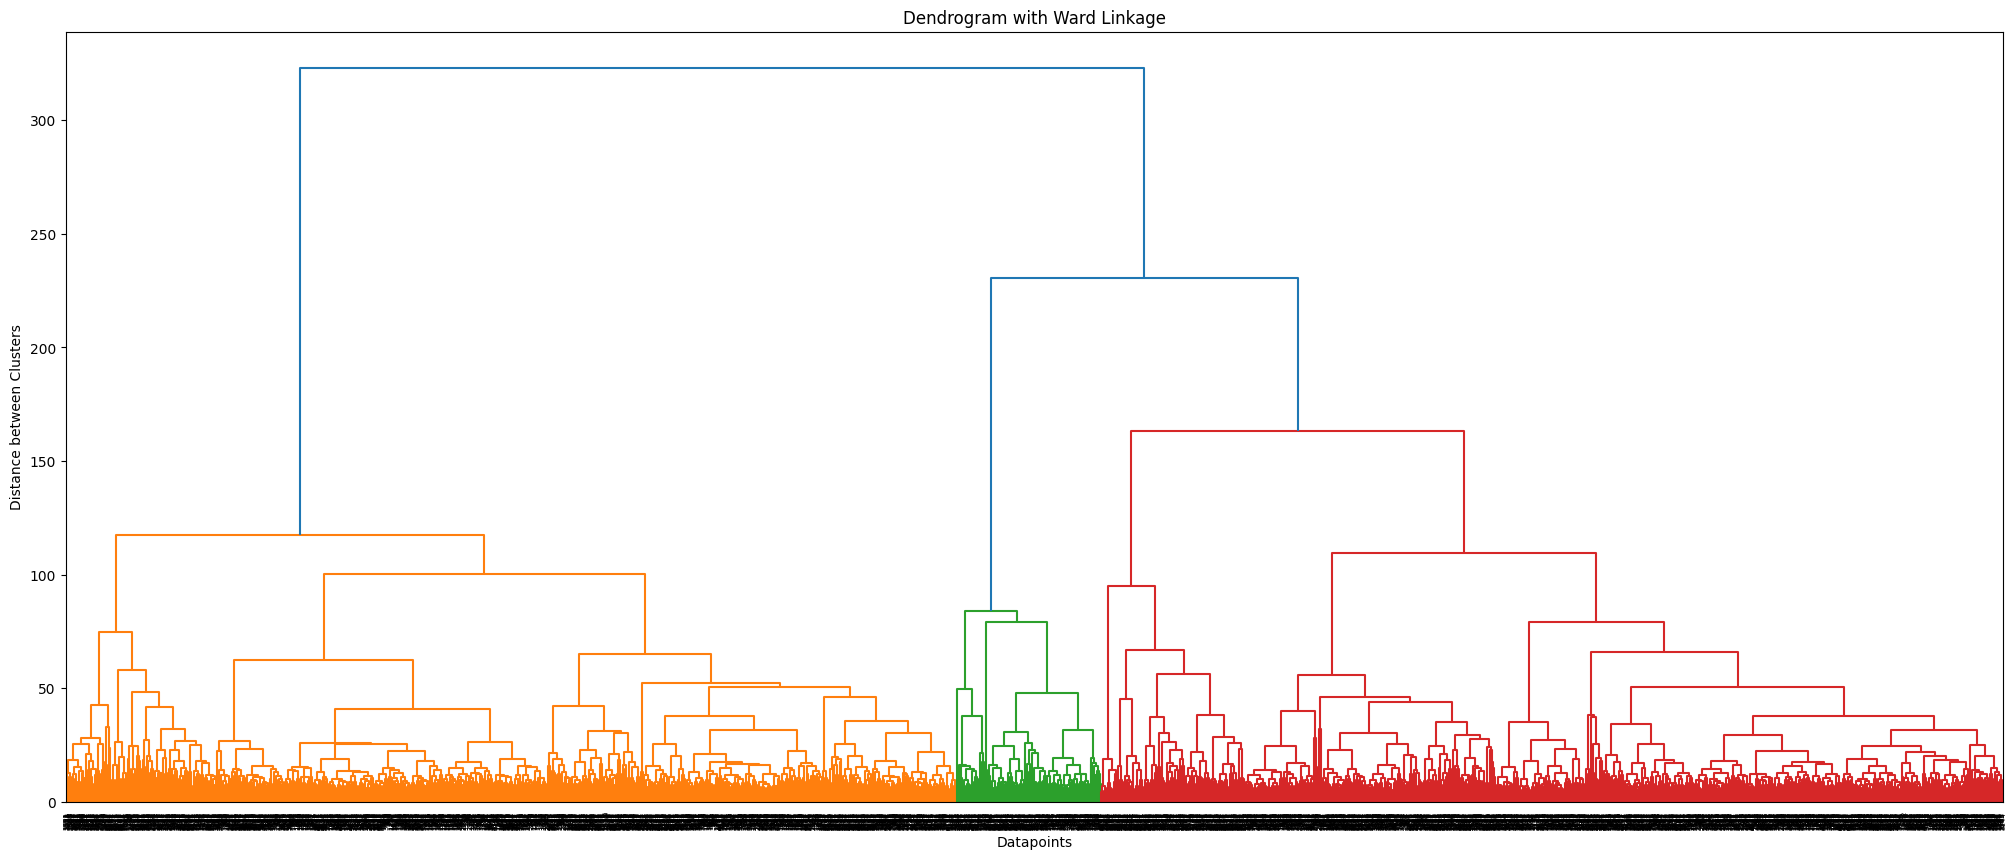

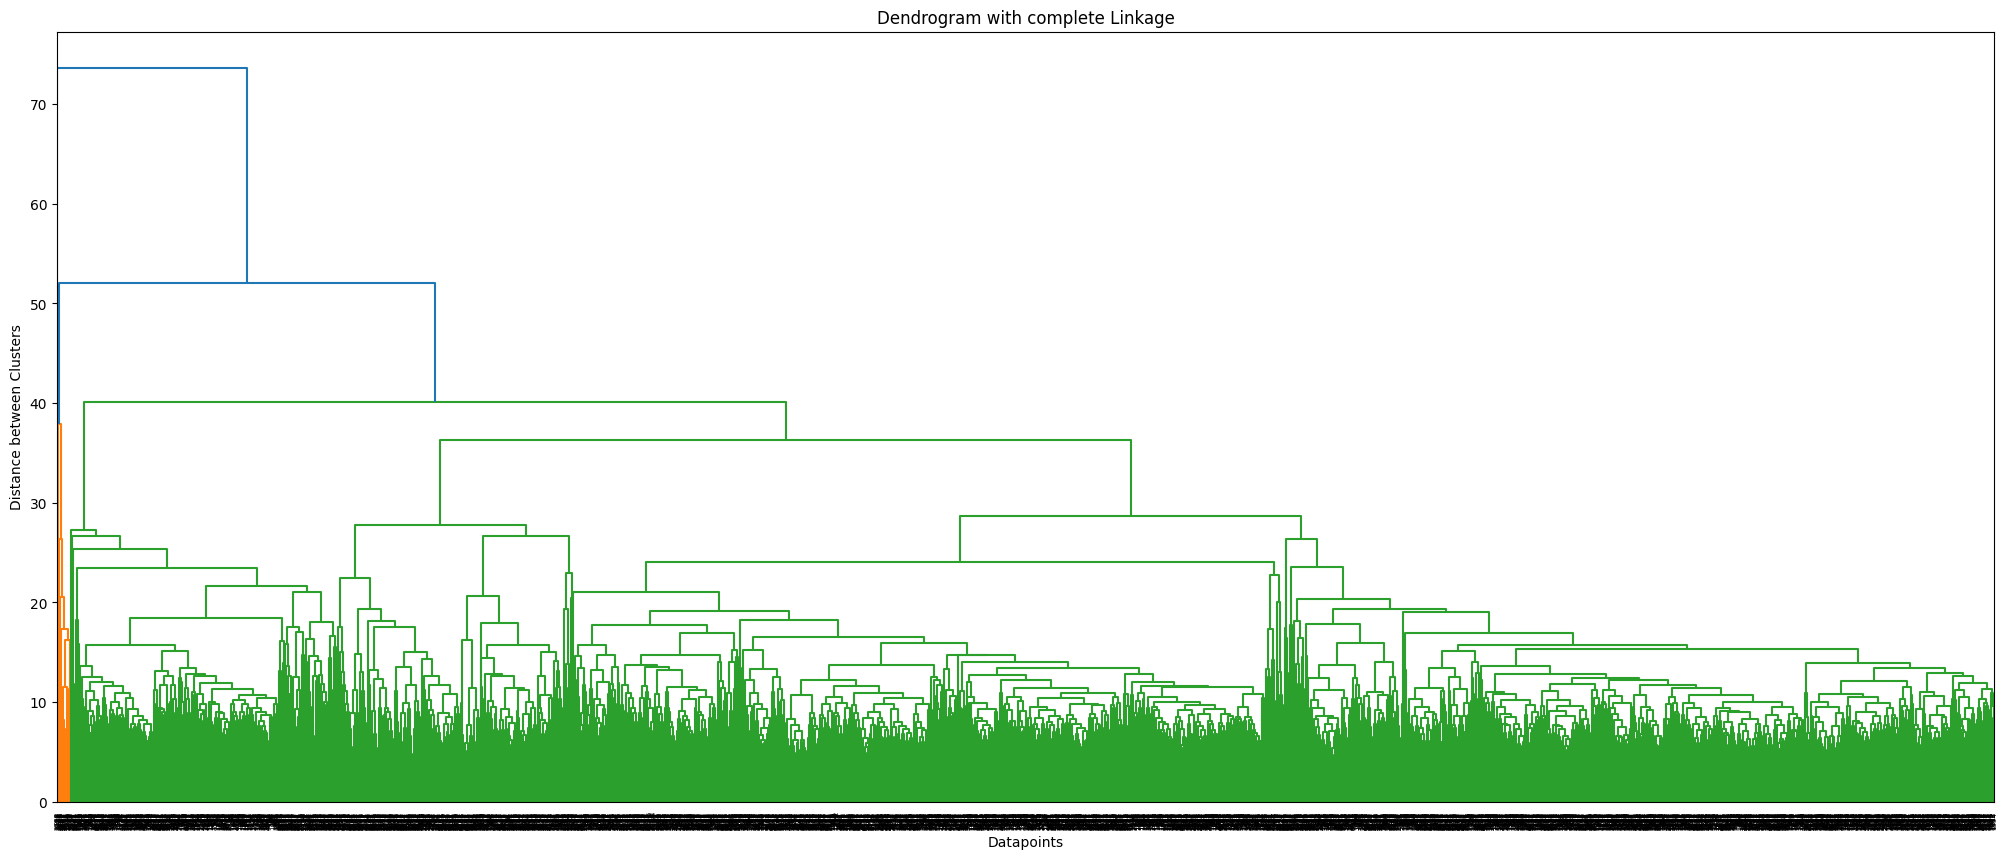

In [27]:
# Perform agglomerative clustering with ward linkage using scikit-learn
clustering_ag = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels_ag = clustering_ag.fit_predict(scaledgenes)

# Plot dendrogram with ward linkage
Z_ward = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn_ward = dendrogram(Z_ward)
plt.title('Dendrogram with Ward Linkage')
plt.ylabel("Distance between Clusters")
plt.xlabel("Datapoints")

# Repeat with a different linkage (complete linkage)
Z_complete = linkage(scaledgenes, 'complete')
fig = plt.figure(figsize=(25, 10))
dn_complete = dendrogram(Z_complete)
plt.title('Dendrogram with complete Linkage')
plt.ylabel("Distance between Clusters")
plt.xlabel("Datapoints")
plt.show()

**Figure 12:**

Top: Dendrogram using Ward Linkage. Ward linkage minimizes the variance within each cluster. This resulted in three clusters, with two clusters that appear similar in size and one cluster that is smaller.

Bottom: Dendrogram using Complete Linkage. Complete linkage calculates the maximum distance between any two points in the clusters being merged. This resulted in one very large cluster, and one very small cluster. Since most of the points are close together as it appears in the t-SNE and UMAP, as well as the other visual aids. The clustering in this dendrogram looks similar in terms of size of the clusters to the DBSCAN clusters when epsilon=9.3 was used; there is one very large cluster and one significantly smaller cluster.

choose ward linkage and plot the dendrogram of the clusters

repeat with a different linkage and comment on differences

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



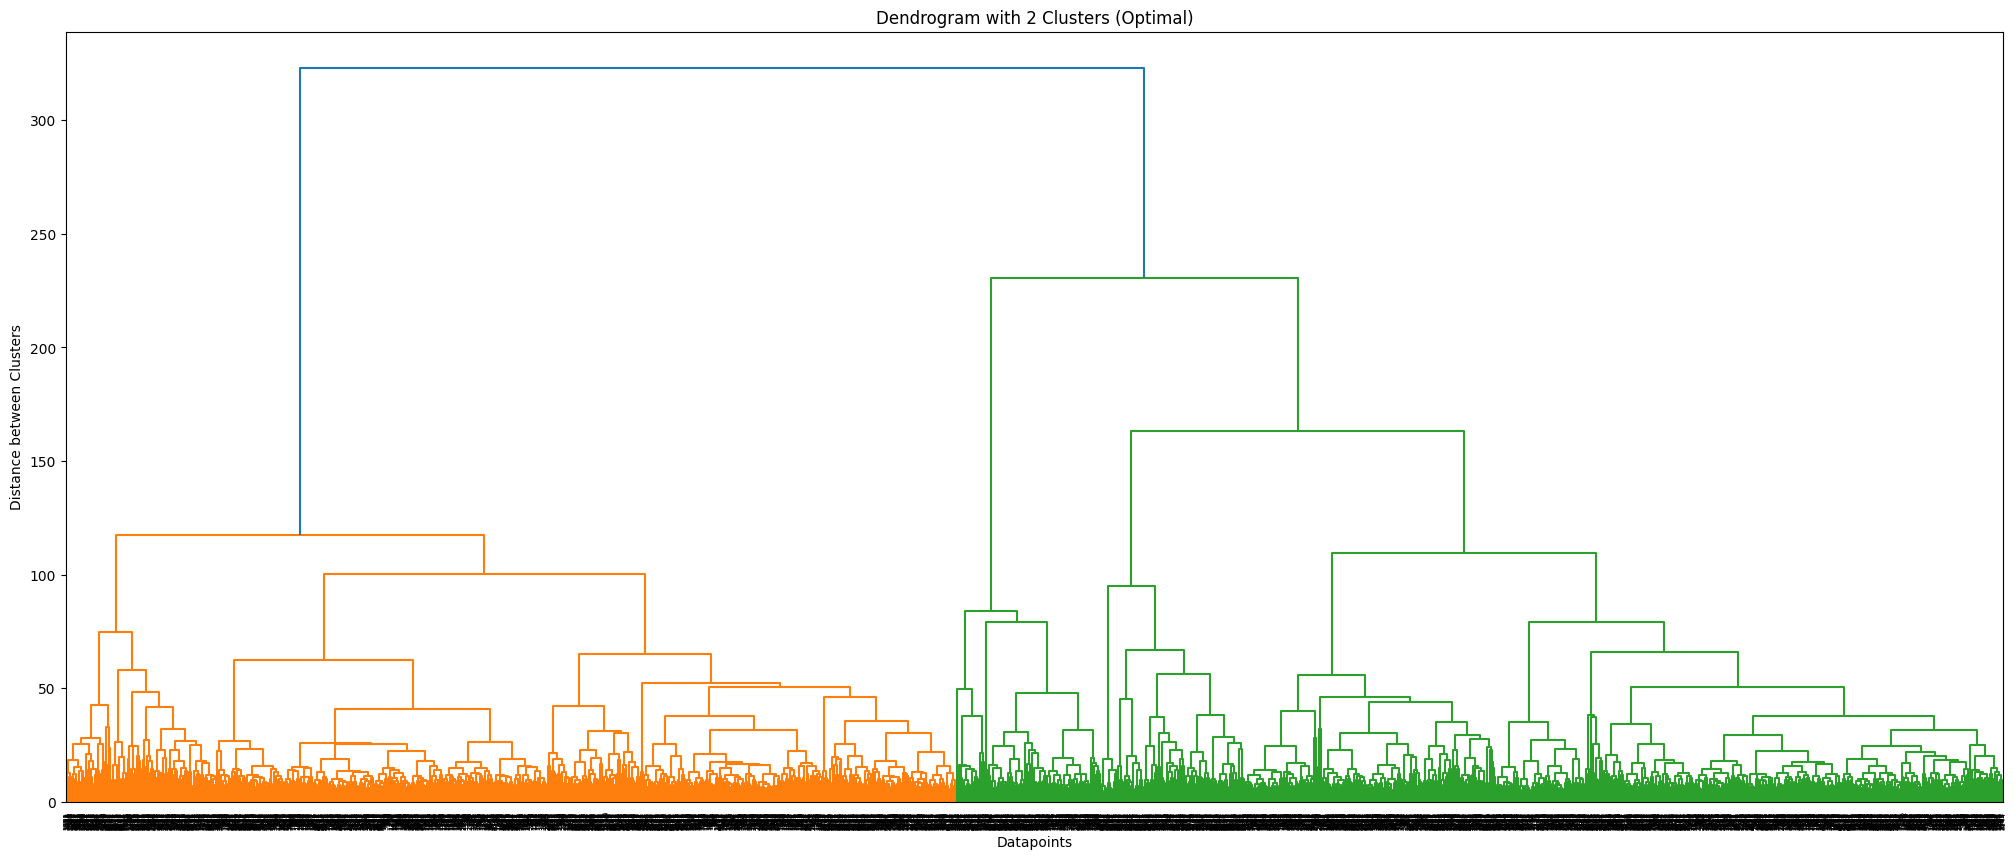

In [28]:
# Evaluate silhouette scores for different cluster numbers
silhouette_scores = []
max_clusters = 10

for n_clusters in range(2, max_clusters + 1):
    clustering_ag = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels_ag = clustering_ag.fit_predict(scaledgenes)
    silhouette_scores.append(silhouette_score(scaledgenes, cluster_labels_ag))

# Find the optimal number of clusters based on silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because started the loop from 2 clusters

# Perform agglomerative clustering with the optimal number of clusters
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
cluster_labels_optimal = clustering_optimal.fit_predict(scaledgenes)

# Get the color threshold to cut the dendrogram
color_threshold = Z_ward[-optimal_clusters + 1, 2]

# Plot dendrogram and manually cut it at the color_threshold
fig = plt.figure(figsize=(25, 10))
dn_optimal = dendrogram(Z_ward, color_threshold=color_threshold)
plt.title(f'Dendrogram with {optimal_clusters} Clusters (Optimal)')
plt.ylabel("Distance between Clusters")
plt.xlabel("Datapoints")
plt.show()


**Figure 13:** The Dendrogram with the optimal number of clusters, which was found to be 2. The optimal number was found using a silhouette score, which is a metric that measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). This amount of clusters is the same result found using the elbow graph in kmeans clustering. The clusters in the dendrogram appear to be somewhat similar in size. Ward linkage, which again, clusters by minimizing the variance within each cluster was used. However, if the dendrogram is cut at a different point along the y axis, like a slightly lower point, we could split the data into four clusters using Agglomerative Clustering.

## VI-c plot the 2D TSNE projection colorcoded as before

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


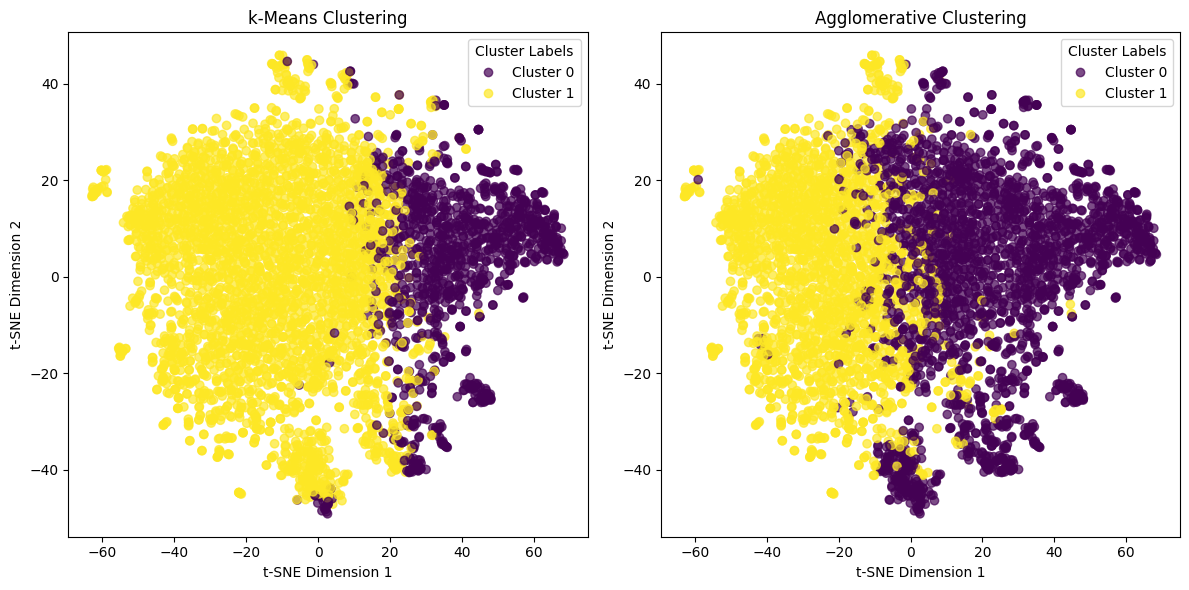

In [25]:
# Number of clusters for k-means
num_clusters_kmeans = 2

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(scaledgenes)

# Perform agglomerative clustering with the optimal number of clusters
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
cluster_labels_optimal = clustering_optimal.fit_predict(scaledgenes)

# Create a 2D t-SNE projection for k-means
tsne_kmeans = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_projection_kmeans = tsne_kmeans.fit_transform(scaledgenes)

# Create a 2D t-SNE projection for agglomerative clustering
tsne_agglomerative = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_projection_agglomerative = tsne_agglomerative.fit_transform(scaledgenes)

# Plot side-by-side or in separate plots with legends
plt.figure(figsize=(12, 6))

# Plot for k-means
plt.subplot(1, 2, 1)
scatter_kmeans = plt.scatter(tsne_projection_kmeans[:, 0], tsne_projection_kmeans[:, 1], c=cluster_labels_kmeans, cmap='viridis', alpha=0.7)
plt.title('k-Means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add legend for k-means
legend_labels_kmeans = [f'Cluster {label}' for label in np.unique(cluster_labels_kmeans)]
plt.legend(handles=scatter_kmeans.legend_elements()[0], labels=legend_labels_kmeans, title='Cluster Labels')

# Plot for agglomerative clustering
plt.subplot(1, 2, 2)
scatter_agglomerative = plt.scatter(tsne_projection_agglomerative[:, 0], tsne_projection_agglomerative[:, 1], c=cluster_labels_optimal, cmap='viridis', alpha=0.7)
plt.title('Agglomerative Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add legend for agglomerative clustering
legend_labels_agglomerative = [f'Cluster {label}' for label in np.unique(cluster_labels_optimal)]
plt.legend(handles=scatter_agglomerative.legend_elements()[0], labels=legend_labels_agglomerative, title='Cluster Labels')

plt.tight_layout()
plt.show()

**Figure 14:** Comparison of the kmeans clustering and the Agglomerative Hierarchical Clustering t-SNE models. Compared to kmeans, the clusters seem more evenly split (the number of points in each cluster is closer) in the Agg. Clustering than kmeans, but the edges dividing the two clusters seems more fuzzy in Agg. Clustering than in kmeans. The borders don't seem to be as clearly defined since there are more purple points in the yellow cluster and vice versa as compared to kmeans.

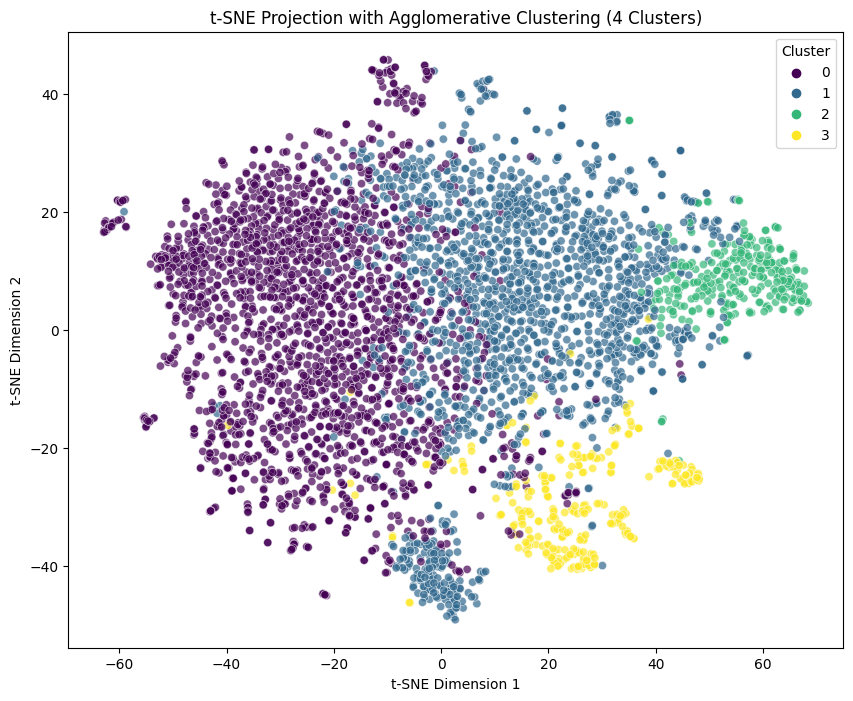

In [26]:
tsne = TSNE(n_components=2, random_state=42)
tsne_projection_4 = tsne.fit_transform(scaledgenes)

#Perform agglomerative clustering with the 4 clusters
clustering_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels_4= clustering_4.fit_predict(scaledgenes)

# Add cluster labels to the t-SNE projection
tsne_projection_with_clusters_4 = pd.DataFrame(tsne_projection_4, columns=['t-SNE Dimension 1', 't-SNE Dimension 2'])
tsne_projection_with_clusters_4['Cluster'] = cluster_labels_4

# Plot the t-SNE projection with color-coded clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Dimension 1', y='t-SNE Dimension 2', hue='Cluster', palette='viridis', data=tsne_projection_with_clusters_4, alpha=0.7)
plt.title('t-SNE Projection with Agglomerative Clustering (4 Clusters)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

**Figure 15:** t-SNE graph of Agglomerative Clustering using 4 clusters. While the previous Figure's optimal clusters was determined using the silhouette score, this amount of optimal clusters was just determined visually from the dendrogram in Figure 13. Compared to kmeans, the number of clusters is larger and not fitting to the elbow plot in Figure 5 (as expected since elbow plots are only useful for kmeans clustering). The edges are again fuzzy and not clearly defined, and the cluster sizes are not similar as they were in the previous Figure.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

Out of the three methods used, I would say that Agglomerative Hierarchical Clustering was the most "useful" method. What is good about Agglomerative clustering is that it creates a hierarchy of clusters, as shown in the dendrogram. To fit one's needs, you can choose the best number of clusters. It is also accommodating of the odd shape of the data, as opposed to kmeans, which works best with spherical and well-defined clusters, and requires one to choose a number of clusters from the beginning. Considering how DBSCAN created clusters that were basically one huge cluster and a bunch of outliers and depending on min_samples and epsilon parameters, some small clusters outside the one large cluster. Since the DBSCAN method is extremely sensitive to these parameters, and there is not well-defined choices for these parameters, it does not seem ideal for the genes dataset.